<a href="https://colab.research.google.com/github/KoalaGeo/HMO_Registry_Notebooks/blob/main/HMO_2019_2024_Loughborough.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
# Install necessary libraries if not already installed
!pip install pandas matplotlib seaborn numpy requests h3 contextily

print("Installation finished!")

Installation finished!


In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colormaps as cm
import numpy as np
import h3
print("H3 Version:")
print(h3.__version__)

print("installation finished!")

H3 Version:
4.2.2
installation finished!


In [90]:
# prompt: import csv from https://github.com/KoalaGeo/HMO_Registry_Notebooks/blob/main/data/CBC_HMO_Register_190227.csv

import pandas as pd
import requests
from io import StringIO

# URLs of the CSV files
url_2019 = "https://raw.githubusercontent.com/KoalaGeo/HMO_Registry_Notebooks/main/data/CBC_HMO_Register_190227.csv"
url_2024 = "https://raw.githubusercontent.com/KoalaGeo/HMO_Registry_Notebooks/main/data/CBC_HMO_Register_240219.csv"

def load_csv_from_url(url):
    """Loads a CSV file from a URL into a pandas DataFrame."""
    try:
        response = requests.get(url)
        response.raise_for_status()  # Raise HTTPError for bad responses (4xx or 5xx)
        csv_data = StringIO(response.text)
        df = pd.read_csv(csv_data)
        return df
    except requests.exceptions.RequestException as e:
        print(f"Error fetching URL: {e}")
        return None
    except pd.errors.ParserError as e:
        print(f"Error parsing CSV: {e}")
        return None

# Load the 2019 data
df_2019_original = load_csv_from_url(url_2019)

# Load the 2024 data
df_2024_original = load_csv_from_url(url_2024)

# Display the first few rows of each DataFrame to verify
if df_2019_original is not None:
    print("2019 Data:")
    print(df_2019_original.head(2))
else:
    print("Failed to load 2019 data.")

if df_2024_original is not None:
    print("\n2024 Data:")
    print(df_2024_original.head(2))
else:
    print("Failed to load 2024 data.")

# Clean the data
def clean_dataframe(df):
    """Cleans a DataFrame, converts columns to int64, and filters rows."""
    if df is None:
        return None

    columns_to_clean = ['uprn', 'street', 'postcode', 'permitted no of occupiers']  # Add other columns as needed
    for col in columns_to_clean:
        if col in df.columns:
            df[col] = df[col].astype(str).str.strip() #ensure all values are strings before stripping.

    # Convert 'uprn' and 'permitted no of occupiers' to int64
    columns_to_int64 = ['uprn', 'permitted no of occupiers']
    for col in columns_to_int64:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce').astype('Int64') #use Int64 to handle nulls.

    # Filter rows based on 'permitted no of occupiers'
    if 'permitted no of occupiers' in df.columns:
        df = df[df['permitted no of occupiers'].between(3, 5)] # Keep rows where the value is between 3 and 4 inclusive

    return df

# Clean the 2019 data
df_2019_cleaned = clean_dataframe(df_2019_original.copy()) #use copy to avoid changing the original dataframe.

# Clean the 2024 data
df_2024_cleaned = clean_dataframe(df_2024_original.copy()) #use copy to avoid changing the original dataframe.

# Display the first few rows of the cleaned DataFrames
if df_2019_cleaned is not None:
    print("\nCleaned 2019 Data:")
    print(df_2019_cleaned.head(2))
else:
    print("Failed to clean 2019 data.")

if df_2024_cleaned is not None:
    print("\nCleaned 2024 Data:")
    print(df_2024_cleaned.head(2))
else:
    print("Failed to clean 2024 data.")

#Example of checking the data types of each dataframe before describe is called.
if df_2019_cleaned is not None:
  print("\n2019 Data types:\n",df_2019_cleaned.dtypes)

if df_2024_cleaned is not None:
  print("\n2024 Data types:\n",df_2024_cleaned.dtypes)


2019 Data:
          uprn house number     street          town  postcode  \
0  10004000811            3  Adam Dale  Loughborough  LE11 3HD   
1  10004000813            5  Adam Dale  Loughborough  LE11 3HD   

     licence expiry  permitted no of occupiers  
0  11 November 2023                          6  
1  07 February 2024                          5  

2024 Data:
           uprn house name house number        street  licence start  \
0  100030453388        NaN           69   Meadow Lane  21 March 2024   
1  100030453391        NaN           72   Meadow Lane  25 March 2024   

  licence expiry  permitted no of occupiers  permitted no. of households  \
0  20 March 2029                       10.0                          1.0   
1  24 March 2029                        8.0                          1.0   

        address   postcode  
0  Loughborough   LE11 1JU  
1  Loughborough   LE11 1JU  

Cleaned 2019 Data:
           uprn house number          street          town  postcode  \
1   10

In [91]:
# Descriptive statistics
if df_2019_cleaned is not None:
    # Convert 'uprn' to category
    # if 'uprn' in df_2019_cleaned.columns:
    #     df_2019_cleaned['uprn'] = df_2019_cleaned['uprn'].astype('category')

    print("Descriptive Statistics - 2019 Data:")
    print(df_2019_cleaned.describe(include='all'))

    count_unique_uprn = df_2019_cleaned['uprn'].nunique()
    print(f"Unique UPRNs (using nunique()): {count_unique_uprn}")
else:
    print("Failed to load 2019 data.")

if df_2024_cleaned is not None:
    # Convert 'uprn' to category
    # if 'uprn' in df_2024_cleaned.columns:
    #     df_2024_cleaned['uprn'] = df_2024_cleaned['uprn'].astype('category')

    print("Descriptive Statistics - 2024 Data:")
    print(df_2024_cleaned.describe(include='all'))

    count_unique_uprn = df_2024_cleaned['uprn'].nunique()
    print(f"Unique UPRNs (using nunique()): {count_unique_uprn}")
else:
    print("Failed to load 2019 data.")

Descriptive Statistics - 2019 Data:
                      uprn house number         street          town  \
count                213.0          213            213           213   
unique                <NA>          104             69             1   
top                   <NA>            7  Arthur Street  Loughborough   
freq                  <NA>            7             12           213   
mean    91577512938.521133          NaN            NaN           NaN   
std     26320514687.652611          NaN            NaN           NaN   
min          10004000065.0          NaN            NaN           NaN   
25%         100030436787.0          NaN            NaN           NaN   
50%         100030445575.0          NaN            NaN           NaN   
75%         100030456984.0          NaN            NaN           NaN   
max         100032040472.0          NaN            NaN           NaN   

        postcode licence expiry  permitted no of occupiers  
count        213            213       

# Street Based Analysis

Using street name to group HMO properties

Plot charts of street names with the most HMO properties, using grouped bar chart to allow comparison of 2019 and 2024 data.

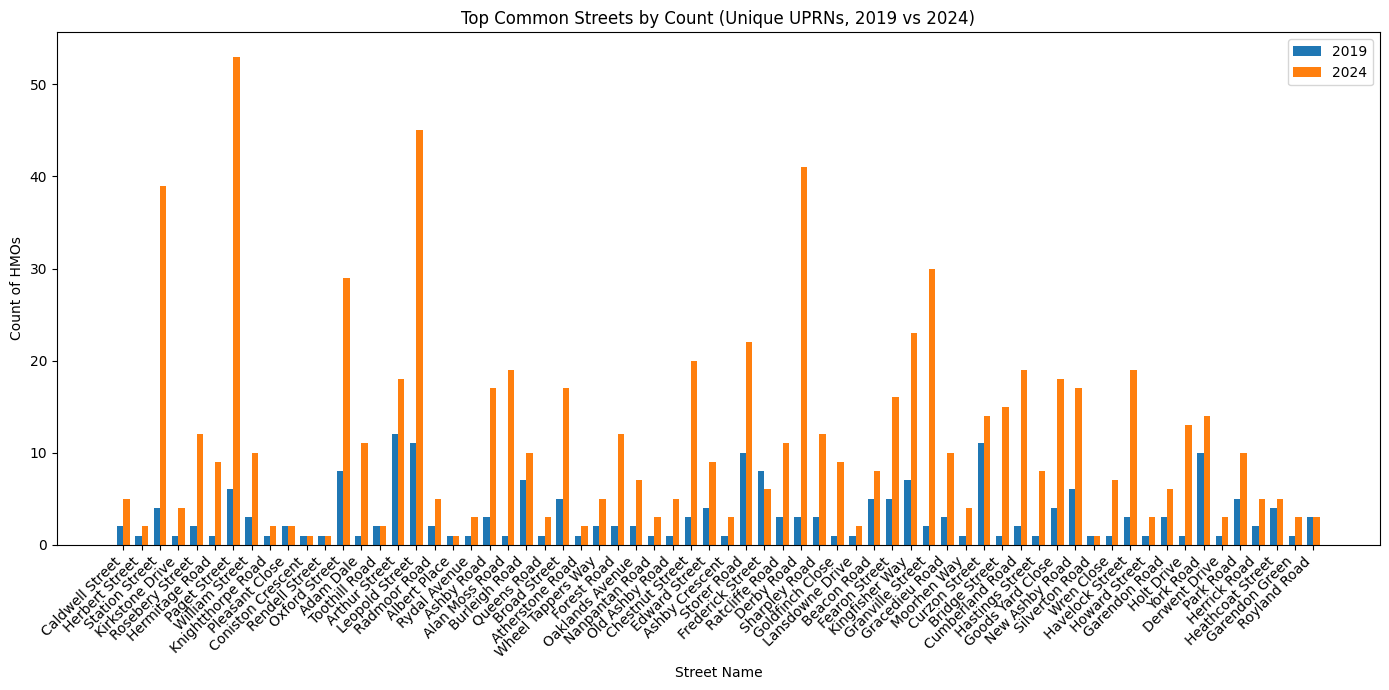

In [92]:
if df_2019_cleaned is not None and df_2024_cleaned is not None:
    # Filter for unique UPRNs and get street counts for 2019
    df_2019_unique = df_2019_cleaned.drop_duplicates(subset='uprn')
    street_counts2019 = df_2019_unique['street'].value_counts().to_dict()

    # Filter for unique UPRNs and get street counts for 2024
    df_2024_unique = df_2024_cleaned.drop_duplicates(subset='uprn')
    street_counts2024 = df_2024_unique['street'].value_counts().to_dict()

    # Sort and get top for 2019
    top_streets_2019 = dict(sorted(street_counts2019.items(), key=lambda item: item[1], reverse=True)[:300])
    street_names_2019 = list(top_streets_2019.keys())
    street_counts_values_2019 = list(top_streets_2019.values())

    # Sort and get top for 2024
    top_streets_2024 = dict(sorted(street_counts2024.items(), key=lambda item: item[1], reverse=True)[:300])
    street_names_2024 = list(top_streets_2024.keys())
    street_counts_values_2024 = list(top_streets_2024.values())

    # Find common streets
    common_streets = list(set(street_names_2019).intersection(set(street_names_2024)))

    # Filter data for common streets
    counts_2019_common = [top_streets_2019.get(street, 0) for street in common_streets]
    counts_2024_common = [top_streets_2024.get(street, 0) for street in common_streets]

    # Create the grouped bar chart
    x = range(len(common_streets))
    width = 0.35

    plt.figure(figsize=(14, 7))
    plt.bar([i - width/2 for i in x], counts_2019_common, width, label='2019')
    plt.bar([i + width/2 for i in x], counts_2024_common, width, label='2024')

    plt.xlabel('Street Name')
    plt.ylabel('Count of HMOs')
    plt.title('Top Common Streets by Count (Unique UPRNs, 2019 vs 2024)')
    plt.xticks(x, common_streets, rotation=45, ha='right')
    plt.legend()
    plt.tight_layout()
    plt.show()

else:
    print("Failed to load data.")

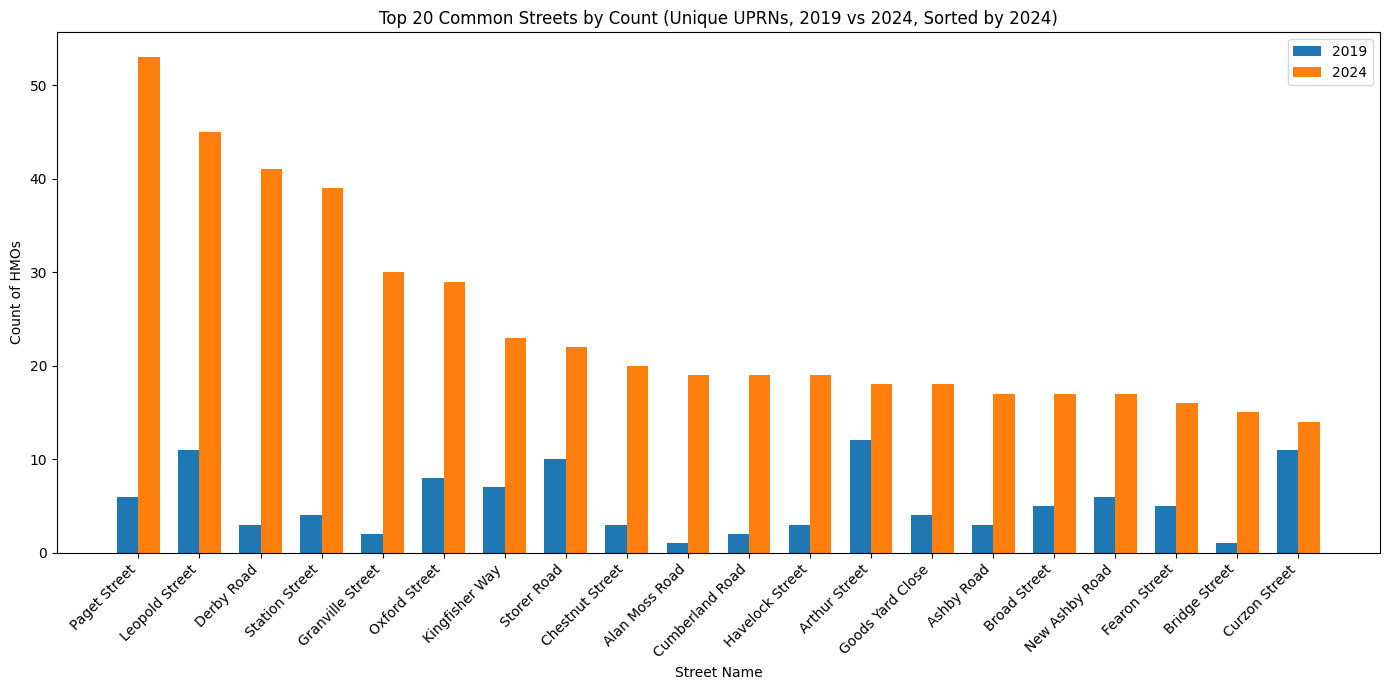

In [93]:
import matplotlib.pyplot as plt

if df_2019_cleaned is not None and df_2024_cleaned is not None:
    # Filter for unique UPRNs and get street counts for 2019
    df_2019_unique = df_2019_cleaned.drop_duplicates(subset='uprn')
    street_counts2019 = df_2019_unique['street'].value_counts().to_dict()

    # Filter for unique UPRNs and get street counts for 2024
    df_2024_unique = df_2024_cleaned.drop_duplicates(subset='uprn')
    street_counts2024 = df_2024_unique['street'].value_counts().to_dict()

    # Sort and get top for 2019
    top_streets_2019 = dict(sorted(street_counts2019.items(), key=lambda item: item[1], reverse=True)[:300])
    street_names_2019 = list(top_streets_2019.keys())
    street_counts_values_2019 = list(top_streets_2019.values())

    # Sort and get top for 2024
    top_streets_2024 = dict(sorted(street_counts2024.items(), key=lambda item: item[1], reverse=True)[:300])
    street_names_2024 = list(top_streets_2024.keys())
    street_counts_values_2024 = list(top_streets_2024.values())

    # Find common streets
    common_streets = list(set(street_names_2019).intersection(set(street_names_2024)))

    # Filter data for common streets
    counts_2019_common = [top_streets_2019.get(street, 0) for street in common_streets]
    counts_2024_common = [top_streets_2024.get(street, 0) for street in common_streets]

    # Combine common streets with counts for sorting
    combined_data = list(zip(common_streets, counts_2019_common, counts_2024_common))

    # Sort by 2024 counts in descending order
    sorted_data = sorted(combined_data, key=lambda x: x[2], reverse=True)

    # Extract sorted data for plotting, limiting to the top 20
    sorted_streets = [item[0] for item in sorted_data[:20]]
    sorted_counts_2019 = [item[1] for item in sorted_data[:20]]
    sorted_counts_2024 = [item[2] for item in sorted_data[:20]]

    # Create the grouped bar chart
    x = range(len(sorted_streets))
    width = 0.35

    plt.figure(figsize=(14, 7))
    plt.bar([i - width/2 for i in x], sorted_counts_2019, width, label='2019')
    plt.bar([i + width/2 for i in x], sorted_counts_2024, width, label='2024')

    plt.xlabel('Street Name')
    plt.ylabel('Count of HMOs')
    plt.title('Top 20 Common Streets by Count (Unique UPRNs, 2019 vs 2024, Sorted by 2024)')
    plt.xticks(x, sorted_streets, rotation=45, ha='right')
    plt.legend()
    plt.tight_layout()
    plt.show()

else:
    print("Failed to load data.")

# Postcode Based Analysis

As above but using PostCode's instead of Street names

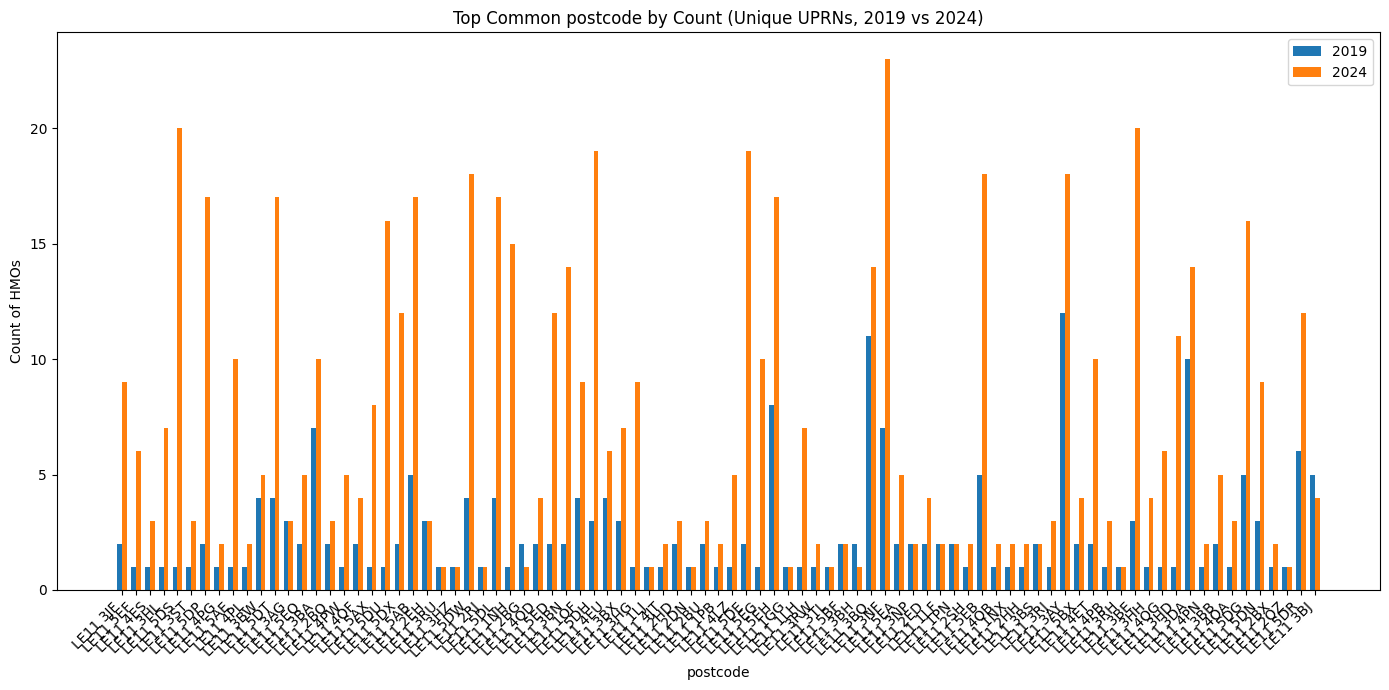

In [94]:
if df_2019_cleaned is not None and df_2024_cleaned is not None:
    # Filter for unique UPRNs and get postcode counts for 2019
    df_2019_unique = df_2019_cleaned.drop_duplicates(subset='uprn')
    postcode_counts2019 = df_2019_unique['postcode'].value_counts().to_dict()

    # Filter for unique UPRNs and get postcode counts for 2024
    df_2024_unique = df_2024_cleaned.drop_duplicates(subset='uprn')
    postcode_counts2024 = df_2024_unique['postcode'].value_counts().to_dict()

    # Sort and get top for 2019
    top_postcode_2019 = dict(sorted(postcode_counts2019.items(), key=lambda item: item[1], reverse=True)[:300])
    postcode_names_2019 = list(top_postcode_2019.keys())
    postcode_counts_values_2019 = list(top_postcode_2019.values())

    # Sort and get top for 2024
    top_postcode_2024 = dict(sorted(postcode_counts2024.items(), key=lambda item: item[1], reverse=True)[:300])
    postcode_names_2024 = list(top_postcode_2024.keys())
    postcode_counts_values_2024 = list(top_postcode_2024.values())

    # Find common postcodes
    common_postcode = list(set(postcode_names_2019).intersection(set(postcode_names_2024)))

    # Filter data for common postcodes
    counts_2019_common = [top_postcode_2019.get(postcode, 0) for postcode in common_postcode]
    counts_2024_common = [top_postcode_2024.get(postcode, 0) for postcode in common_postcode]

    # Create the grouped bar chart
    x = range(len(common_postcode))
    width = 0.35

    plt.figure(figsize=(14, 7))
    plt.bar([i - width/2 for i in x], counts_2019_common, width, label='2019')
    plt.bar([i + width/2 for i in x], counts_2024_common, width, label='2024')

    plt.xlabel('postcode')
    plt.ylabel('Count of HMOs')
    plt.title('Top Common postcode by Count (Unique UPRNs, 2019 vs 2024)')
    plt.xticks(x, common_postcode, rotation=45, ha='right')
    plt.legend()
    plt.tight_layout()
    plt.show()

else:
    print("Failed to load data.")

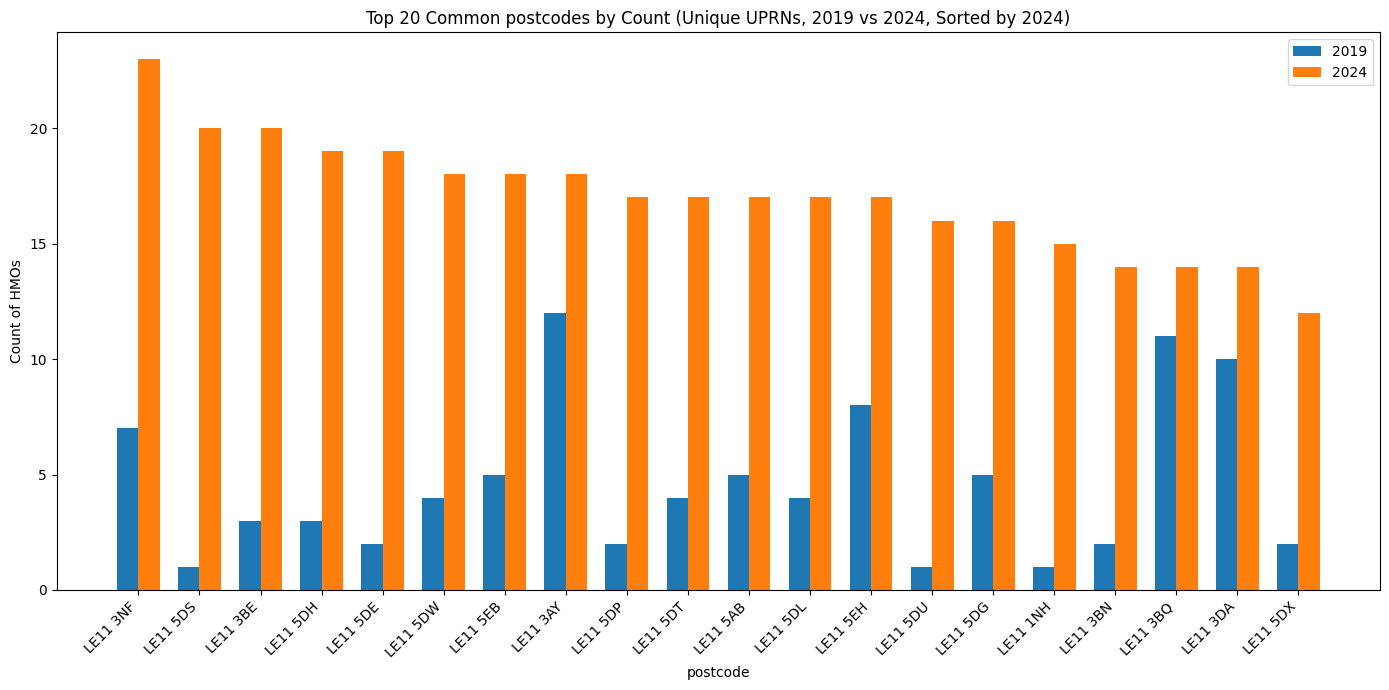

In [95]:
import matplotlib.pyplot as plt

if df_2019_cleaned is not None and df_2024_cleaned is not None:
    # Filter for unique UPRNs and get postcode counts for 2019
    df_2019_unique = df_2019_cleaned.drop_duplicates(subset='uprn')
    postcode_counts2019 = df_2019_unique['postcode'].value_counts().to_dict()

    # Filter for unique UPRNs and get street counts for 2024
    df_2024_unique = df_2024_cleaned.drop_duplicates(subset='uprn')
    postcode_counts2024 = df_2024_unique['postcode'].value_counts().to_dict()

    # Sort and get top for 2019
    top_postcodes_2019 = dict(sorted(postcode_counts2019.items(), key=lambda item: item[1], reverse=True)[:300])
    postcode_names_2019 = list(top_postcodes_2019.keys())
    postcode_counts_values_2019 = list(top_postcodes_2019.values())

    # Sort and get top for 2024
    top_postcodes_2024 = dict(sorted(postcode_counts2024.items(), key=lambda item: item[1], reverse=True)[:300])
    postcode_names_2024 = list(top_postcodes_2024.keys())
    postcode_counts_values_2024 = list(top_postcodes_2024.values())

    # Find common postcodes
    common_postcodes = list(set(postcode_names_2019).intersection(set(postcode_names_2024)))

    # Filter data for common postcodes
    counts_2019_common = [top_postcodes_2019.get(postcode, 0) for postcode in common_postcodes]
    counts_2024_common = [top_postcodes_2024.get(postcode, 0) for postcode in common_postcodes]

    # Combine common postcodes with counts for sorting
    combined_data = list(zip(common_postcodes, counts_2019_common, counts_2024_common))

    # Sort by 2024 counts in descending order
    sorted_data = sorted(combined_data, key=lambda x: x[2], reverse=True)

    # Extract sorted data for plotting, limiting to the top 20
    sorted_postcodes = [item[0] for item in sorted_data[:20]]
    sorted_counts_2019 = [item[1] for item in sorted_data[:20]]
    sorted_counts_2024 = [item[2] for item in sorted_data[:20]]

    # Create the grouped bar chart
    x = range(len(sorted_postcodes))
    width = 0.35

    plt.figure(figsize=(14, 7))
    plt.bar([i - width/2 for i in x], sorted_counts_2019, width, label='2019')
    plt.bar([i + width/2 for i in x], sorted_counts_2024, width, label='2024')

    plt.xlabel('postcode')
    plt.ylabel('Count of HMOs')
    plt.title('Top 20 Common postcodes by Count (Unique UPRNs, 2019 vs 2024, Sorted by 2024)')
    plt.xticks(x, sorted_postcodes, rotation=45, ha='right')
    plt.legend()
    plt.tight_layout()
    plt.show()

else:
    print("Failed to load data.")

# Geospatial Analysis using H3 Indexing

Using UPRN's we can join the HMO register with the OS Open UPRN dataset to get geometries for each property. We can then index using the H3 grid system to gain an understanding of the spatial relations on HMO properties in Loughborough

In [96]:
import pandas as pd
import requests
import zipfile
import io
import os

# Check if df_uprn.csv exists
if os.path.exists("df_uprn.csv"):
    try:
        df_uprn = pd.read_csv("df_uprn.csv")
        print("OS OpenUPRN data loaded from df_uprn.csv.")
    except Exception as e:
        print(f"Error loading df_uprn.csv: {e}")
        df_uprn = None
else:
    # Download and unzip OS OpenUPRN data
    try:
        url_uprn = "https://api.os.uk/downloads/v1/products/OpenUPRN/downloads?area=GB&format=CSV&redirect"
        response = requests.get(url_uprn, stream=True)
        response.raise_for_status()

        z = zipfile.ZipFile(io.BytesIO(response.content))
        z.extractall("/tmp/uprn")

        for filename in z.namelist():
            if filename.endswith(".csv"):
                uprn_file = filename
                break

        df_uprn = pd.read_csv(f"/tmp/uprn/{uprn_file}")
        print("OS OpenUPRN data downloaded and unzipped successfully.")
        df_uprn.to_csv("df_uprn.csv", index=False)
    except requests.exceptions.RequestException as e:
        print(f"Error downloading OS OpenUPRN data: {e}")
        df_uprn = None
    except Exception as e:
        print(f"Error during unzip or CSV read: {e}")
        df_uprn = None


OS OpenUPRN data loaded from df_uprn.csv.


In [99]:

df_2019 = df_2019_cleaned.copy()
df_2024 = df_2024_cleaned.copy()

# Example of merging with the UPRN data if available:
if df_2019 is not None and df_2024 is not None and df_uprn is not None:
    # The Int64 type can handle nulls.
    df_uprn['UPRN'] = df_uprn['UPRN'].astype('Int64')

    print("df_2019 uprn type:", df_2024['uprn'].dtype)
    print("df_2024 uprn type:", df_2024['uprn'].dtype)
    print("df_uprn UPRN type:", df_uprn['UPRN'].dtype)

    # Merge df_2019 with df_uprn
    df_2019_merged = pd.merge(df_2019, df_uprn[['UPRN', 'LATITUDE', 'LONGITUDE']], left_on='uprn', right_on='UPRN', how='left')

    # Merge df_2024 with df_uprn
    df_2024_merged = pd.merge(df_2024, df_uprn[['UPRN', 'LATITUDE', 'LONGITUDE']], left_on='uprn', right_on='UPRN', how='left')

    print("df_2019_merged head:")
    print(df_2019_merged.head(2))
    print("df_2024_merged head:")
    print(df_2024_merged.head(2))

    df_2019_merged.to_csv("df_2019.csv", index=False)
    print("df_2019.csv exported.")

    df_2024_merged.to_csv("df_2024.csv", index=False)
    print("df_2024.csv exported.")

    # Find rows with no UPRN match
    df_2019_no_match = df_2019_merged[df_2019_merged['UPRN'].isnull()]
    df_2024_no_match = df_2024_merged[df_2024_merged['UPRN'].isnull()]

    # Export to CSV if there are unmatched UPRNs
    if not df_2019_no_match.empty:
        df_2019_no_match.to_csv("df_2019_no_uprn_match.csv", index=False)
        print("df_2019_no_uprn_match.csv exported.")
    else:
        print("No unmatched UPRNs in df_2019.")

    if not df_2024_no_match.empty:
        df_2024_no_match.to_csv("df_2024_no_uprn_match.csv", index=False)
        print("df_2024_no_uprn_match.csv exported.")
    else:
        print("No unmatched UPRNs in df_2024.")

    print("df_2019_merged head:")
    print(df_2019_merged.head())
    print("\nRows in df_2019 with missing LATITUDE/LONGITUDE:")
    print(df_2019_merged[df_2019_merged['LATITUDE'].isnull()].head())

    print("\ndf_2024 head:")
    print(df_2024_merged.head())
    print("\nRows in df_2024 with missing LATITUDE/LONGITUDE:")
    print(df_2024_merged[df_2024_merged['LATITUDE'].isnull()].head())

else:
    print("One or more DataFrames are None, skipping merge and export.")

df_2019 uprn type: Int64
df_2024 uprn type: Int64
df_uprn UPRN type: Int64
df_2019_merged head:
           uprn house number          street          town  postcode  \
0   10004000813            5       Adam Dale  Loughborough  LE11 3HD   
1  100030430594          222  Alan Moss Road  Loughborough  LE11 4LZ   

     licence expiry  permitted no of occupiers          UPRN   LATITUDE  \
0  07 February 2024                          5   10004000813  52.766920   
1  16 November 2023                          5  100030430594  52.772853   

   LONGITUDE  
0  -1.215938  
1  -1.231939  
df_2024_merged head:
           uprn house name                      house number  \
0   10023778152    Flat 1   Great Central Apartments      2a   
1  200000844872        NaN                                 1   

             street  licence start licence expiry  permitted no of occupiers  \
0  Wharncliffe Road  11 March 2024  10 March 2029                          4   
1      Annies Wharf  18 March 2024  17 Mar

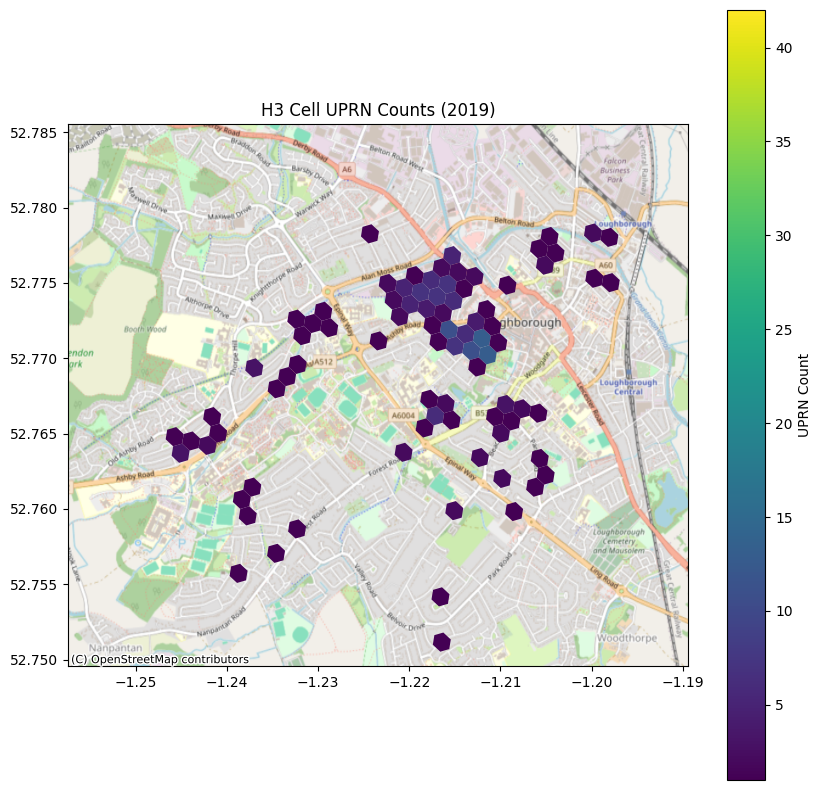

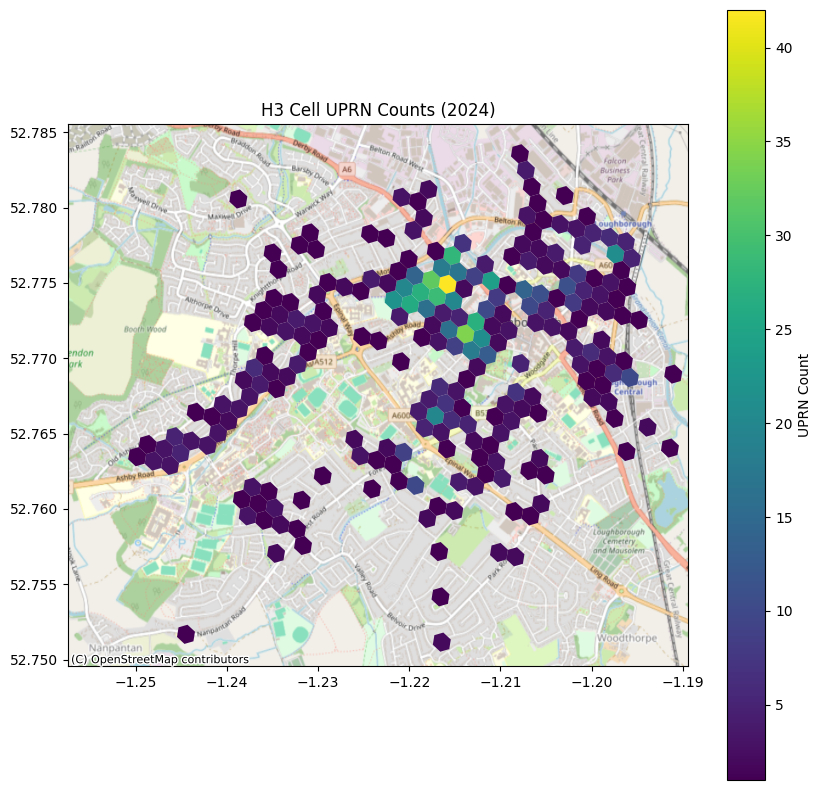

In [102]:
import h3
import pandas as pd
import geopandas as gpd
from shapely.geometry import Polygon
from shapely import wkt
import matplotlib.pyplot as plt
import contextily as ctx
import numpy as np

def add_h3_index(df):
    if df is not None and 'LATITUDE' in df.columns and 'LONGITUDE' in df.columns:
        # Filter out rows with missing lat/long before applying h3
        df = df.dropna(subset=['LATITUDE', 'LONGITUDE'])
        df = df[(df['LATITUDE'] >= -90) & (df['LATITUDE'] <= 90) & (df['LONGITUDE'] >= -180) & (df['LONGITUDE'] <= 180)]

        def get_h3(lat, lng):
            return h3.latlng_to_cell(lat, lng, 10)
        df['h3_index'] = df.apply(lambda row: get_h3(row['LATITUDE'], row['LONGITUDE']), axis=1)
    return df

# Assuming df_2019 and df_2024 are already loaded and processed
df_2019 = add_h3_index(df_2019_merged)
df_2024 = add_h3_index(df_2024_merged)

def plot_h3_counts(df, title, bbox_wkt=None, vmin=None, vmax=None):
    if df is not None and 'h3_index' in df.columns:
        h3_counts = df['h3_index'].value_counts().to_dict()

        h3_data = []
        for h3_index, count in h3_counts.items():
            boundary = h3.cell_to_boundary(h3_index)
            try:
                polygon = Polygon([(lng, lat) for lat, lng in boundary])
                h3_data.append({'h3_index': h3_index, 'count': count, 'geometry': polygon})
            except Exception as e:
                print(f"Error creating polygon for h3_index {h3_index}: {e}")
                #skip adding this row.

        gdf = gpd.GeoDataFrame(h3_data, crs="EPSG:4326")

        #remove rows with no geometry.
        gdf = gdf[~gdf.geometry.isna()]

        #remove rows with no geometry.
        gdf = gdf[~gdf.geometry.isna()]

        fig, ax = plt.subplots(1, 1, figsize=(10, 10))

        if bbox_wkt: #if a bounding box wkt has been provided
            bounding_polygon = wkt.loads(bbox_wkt)
            gdf = gdf[gdf.geometry.intersects(bounding_polygon)] #filter geodataframe

            minx, miny, maxx, maxy = bounding_polygon.bounds
            ax.set_xlim(minx, maxx)
            ax.set_ylim(miny, maxy)

        gdf.plot(column='count', ax=ax, legend=True, cmap='viridis', legend_kwds={'label': "UPRN Count"}, vmin=vmin, vmax=vmax)
        ax.set_title(title)
        ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik) #add basemap
        plt.show()


bbox_wkt = "POLYGON ((-1.25742 52.749594, -1.189442 52.749594, -1.189442 52.785531, -1.25742 52.785531, -1.25742 52.749594))"

# Calculate the global min and max values across both dataframes.
all_counts = pd.concat([df_2019['h3_index'].value_counts(), df_2024['h3_index'].value_counts()])
global_min = all_counts.min()
global_max = all_counts.max()

# Plot for 2019
plot_h3_counts(df_2019, "H3 Cell UPRN Counts (2019)", bbox_wkt=bbox_wkt, vmin=global_min, vmax=global_max)

# Plot for 2024
plot_h3_counts(df_2024, "H3 Cell UPRN Counts (2024)", bbox_wkt=bbox_wkt, vmin=global_min, vmax=global_max)

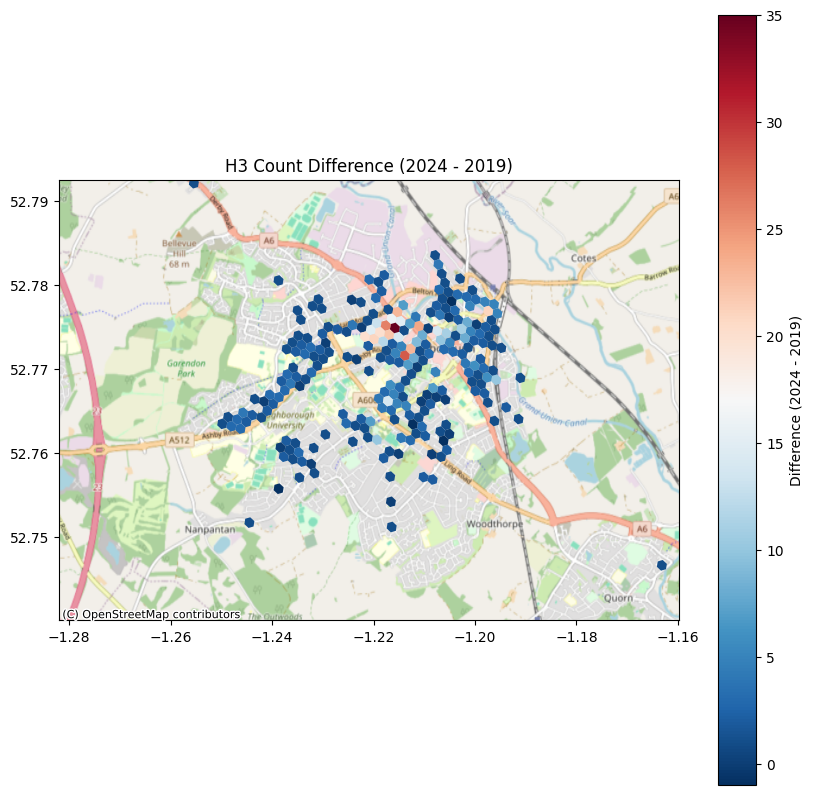

In [111]:
import h3
import pandas as pd
import geopandas as gpd
from shapely.geometry import Polygon, shape
from shapely import wkt
import matplotlib.pyplot as plt
import contextily as ctx
import numpy as np

df_2019 = df_2019_merged.copy()
df_2024 = df_2024_merged.copy()

def add_h3_index(df):
    if df is not None and 'LATITUDE' in df.columns and 'LONGITUDE' in df.columns:
        # Filter out rows with missing lat/long before applying h3
        df = df.dropna(subset=['LATITUDE', 'LONGITUDE'])
        df = df[(df['LATITUDE'] >= -90) & (df['LATITUDE'] <= 90) & (df['LONGITUDE'] >= -180) & (df['LONGITUDE'] <= 180)]

        def get_h3(lat, lng):
            return h3.latlng_to_cell(lat, lng, 10)

        df['h3_index'] = df.apply(lambda row: get_h3(row['LATITUDE'], row['LONGITUDE']), axis=1)
    return df

df_2019 = add_h3_index(df_2019)
df_2024 = add_h3_index(df_2024)

def plot_h3_difference(df_2019, df_2024, title, bbox_wkt=None, vmin=None, vmax=None):
    if df_2019 is not None and 'h3_index' in df_2019.columns and df_2024 is not None and 'h3_index' in df_2024.columns:
        counts_2019 = df_2019['h3_index'].value_counts().to_dict()
        counts_2024 = df_2024['h3_index'].value_counts().to_dict()

        h3_data = []
        all_h3_indexes = set(list(counts_2019.keys()) + list(counts_2024.keys()))

        for h3_index in all_h3_indexes:
            count_2019 = counts_2019.get(h3_index, 0)
            count_2024 = counts_2024.get(h3_index, 0)
            difference = count_2024 - count_2019

            boundary = h3.cell_to_boundary(h3_index)
            try:
                polygon = Polygon([(lng, lat) for lat, lng in boundary])
                h3_data.append({'h3_index': h3_index, 'difference': difference, 'geometry': polygon})
            except Exception as e:
                print(f"Error creating polygon for h3_index {h3_index}: {e}")

        gdf = gpd.GeoDataFrame(h3_data, crs="EPSG:4326")
        gdf = gdf[~gdf.geometry.isna()]

        fig, ax = plt.subplots(1, 1, figsize=(10, 10))

        if bbox_wkt:
            bounding_polygon = wkt.loads(bbox_wkt)
            gdf = gdf[gdf.geometry.intersects(bounding_polygon)]

            minx, miny, maxx, maxy = bounding_polygon.bounds
            ax.set_xlim(minx, maxx)
            ax.set_ylim(miny, maxy)

        gdf.plot(column='difference', ax=ax, legend=True, cmap='RdBu_r', legend_kwds={'label': "Difference (2024 - 2019)"}, vmin=vmin, vmax=vmax)
        ax.set_title(title)
        ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)
        plt.show()

# Example bounding box: (minx, miny, maxx, maxy)
bbox_wkt_example = "POLYGON ((-1.281967 52.740033, -1.159744 52.740033, -1.159744 52.79259, -1.281967 52.79259, -1.281967 52.740033))"

# Calculate the global min and max difference
diff_counts = []
counts_2019 = df_2019['h3_index'].value_counts().to_dict()
counts_2024 = df_2024['h3_index'].value_counts().to_dict()
all_h3_indexes = set(list(counts_2019.keys()) + list(counts_2024.keys()))

for h3_index in all_h3_indexes:
    count_2019 = counts_2019.get(h3_index, 0)
    count_2024 = counts_2024.get(h3_index, 0)
    diff_counts.append(count_2024 - count_2019)

global_min = min(diff_counts)
global_max = max(diff_counts)

plot_h3_difference(df_2019, df_2024, "H3 Count Difference (2024 - 2019)", bbox_wkt=bbox_wkt_example, vmin=global_min, vmax=global_max)